In [47]:
import numpy as np
import scipy as sc
from scipy.spatial import distance_matrix
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

In [48]:
data = pd.read_csv('2022_Project_distance_Matrix.csv')
ARFL = data[data['ARFL'] == 0]
ARFL

,ARFL,Argonne,Boeing,Delta Dental,Ford,Hope Village,Kellogg's,Neogen,Old Nation,Qside
1,0,1,3,2,4,8,6,5,7,9
4,0,2,1,8,7,3,9,6,4,5
14,0,4,1,7,2,8,5,3,6,9
18,0,5,9,2,1,3,8,4,7,6
22,0,3,1,7,6,9,5,2,4,8


In [49]:
team_wise_data = pd.DataFrame(data=[], columns=data.columns)
for i in data.columns:
    temp_team = data[data[i] == 0]
    team_wise_data = pd.concat([team_wise_data, temp_team])

In [50]:
team_wise_data.head()

,ARFL,Argonne,Boeing,Delta Dental,Ford,Hope Village,Kellogg's,Neogen,Old Nation,Qside
1,0,1,3,2,4,8,6,5,7,9
4,0,2,1,8,7,3,9,6,4,5
14,0,4,1,7,2,8,5,3,6,9
18,0,5,9,2,1,3,8,4,7,6
22,0,3,1,7,6,9,5,2,4,8


<AxesSubplot:>

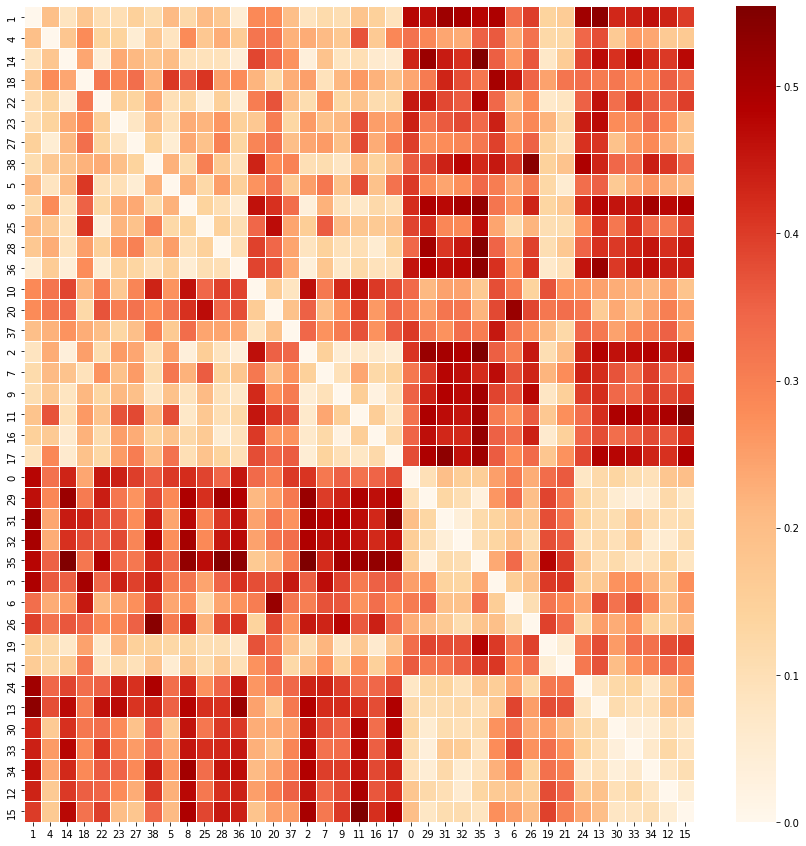

In [51]:
pairwise_top = pd.DataFrame(squareform(pdist(team_wise_data, metric='cosine')),
                            columns = team_wise_data.index,
                            index = team_wise_data.index)

plt.figure(figsize=(15,15))
sns.heatmap(pairwise_top, cmap='OrRd', linewidth=1)